# 1. Setup and Load Data

### 1.1 Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'Data'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [7]:
# os.listdir(os.path.join(data_dir,'Happy'))

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [ ]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         print(image)

In [ ]:
# img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))
# img.shape

In [ ]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# plt.show()

### 1.3 Load Data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

In [ ]:
# data_iterator = data.as_numpy_iterator()

In [ ]:
# batch = data_iterator.next()

In [ ]:
# batch[1]

In [ ]:
# scaled = batch[0] / 255

In [ ]:
# scaled.max()

In [ ]:
# Class 1 = sad people
# Class 0 = happy people
# batch[1]

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate (batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

### 2.1 Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()
# 0 = happy people
# 1 = sad people

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [ ]:
# len(data)

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
val_size+train_size+test_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 3. Deep Model

### 3.1 Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

### 3.2 Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 12s 3s/step - loss: 1.3185 - accuracy: 0.5104 - val_loss: 1.8436 - val_accuracy: 0.4062
Epoch 2/20
3/3 [==============================] - 8s 2s/step - loss: 0.9490 - accuracy: 0.5417 - val_loss: 0.8008 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 8s 2s/step - loss: 0.7677 - accuracy: 0.5312 - val_loss: 0.6934 - val_accuracy: 0.5625
Epoch 4/20
3/3 [==============================] - 8s 2s/step - loss: 0.6888 - accuracy: 0.5208 - val_loss: 0.6933 - val_accuracy: 0.4688
Epoch 5/20
3/3 [==============================] - 8s 2s/step - loss: 0.6818 - accuracy: 0.7083 - val_loss: 0.6610 - val_accuracy: 0.8125
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.6558 - accuracy: 0.6979 - val_loss: 0.6439 - val_accuracy: 0.5312
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 0.6750 - accuracy: 0.6875 - val_loss: 0.5624 - val_accuracy: 0.6562
Epoch 8/20
3/3 [======================

In [36]:
hist.history

{'loss': [1.3185378313064575,
  0.9489551186561584,
  0.7676682472229004,
  0.6888201236724854,
  0.6817509531974792,
  0.655794620513916,
  0.6749975085258484,
  0.6060512661933899,
  0.5786060690879822,
  0.5304075479507446,
  0.4473799765110016,
  0.3736688792705536,
  0.27323901653289795,
  0.22452537715435028,
  0.2487851232290268,
  0.2440679520368576,
  0.21360307931900024,
  0.17646020650863647,
  0.17160679399967194,
  0.09843560308218002],
 'accuracy': [0.5104166865348816,
  0.5416666865348816,
  0.53125,
  0.5208333134651184,
  0.7083333134651184,
  0.6979166865348816,
  0.6875,
  0.59375,
  0.6458333134651184,
  0.75,
  0.8541666865348816,
  0.9583333134651184,
  0.9479166865348816,
  0.9270833134651184,
  0.9166666865348816,
  0.8854166865348816,
  0.9375,
  0.96875,
  0.9583333134651184,
  1.0],
 'val_loss': [1.843590497970581,
  0.8008257150650024,
  0.6934404969215393,
  0.6933470368385315,
  0.661040186882019,
  0.6438798904418945,
  0.5623915195465088,
  0.60918629169

### 3.3 Plot Performance

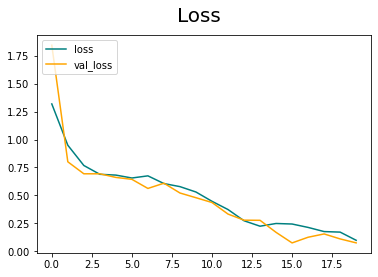

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

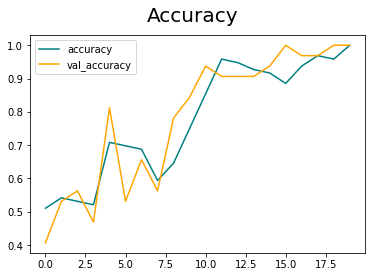

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
len(test)

1

In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 508ms/step


In [43]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### 4.2 Test

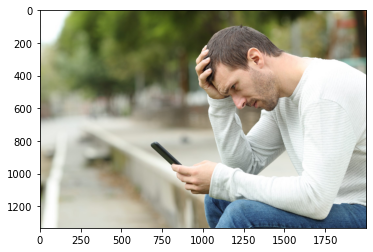

In [44]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

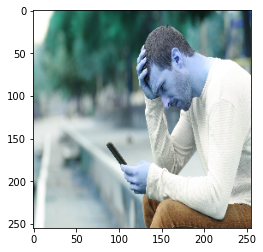

In [45]:
resize = tf.image.resize(img,(255,255))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 199ms/step


In [47]:
yhat

array([[0.6862793]], dtype=float32)

In [48]:
if yhat>0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Sad
